# Monet style video generator
A project by Debarati Datta (ID: 030854640)


This is the final project created for Machine Vision course CECS 553.




First, we install the libraries required.

In [64]:
%pip install torch torchvision
%pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-asvp9esd
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-asvp9esd
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 831cdc10906a23aabe4591a4be06f4c989e4ee30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-0cb5e2mo/groundingdino_29ec03c87b414b8b824ceb7b223e593c
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-0cb5e2mo/groundingdino_29ec03c87b414b8b824ceb7b223e593c
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 3a2b344737cb0f3c3f12d0f7f58be5dc71198289
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

Importing all dependencies:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
import requests

## The LangSAM model
This project focuses on Image segmentation by the Segment Anything Model by Meta. The model has been downloaded from the Github repository of LangSAM, that takes in a prompt along with an input to segment the image.

In [2]:
from PIL import Image

image_pil = Image.open("mvproject/NYC-street-scene.jpg")
print(image_pil)

<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=4201x2790 at 0x730185622950>


In [3]:
from PIL import Image
from lang_sam import LangSAM

/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._

In [4]:
model = LangSAM()
image_pil = Image.open("mvproject/NYC-street-scene.jpg").convert("RGB")
text_prompt = "car"
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/ddatta/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [8]:
def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

def detect_from_text(text, imagepath):
    image_pil = Image.open(imagepath).convert("RGB")
    masks, boxes, phrases, logits = model.predict(image_pil, text)
    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]
    display_image_with_masks(image_pil, masks)

### Sample Image
First, we work with a sample image of New York city. This model returns all 'CARS' identified in different masks

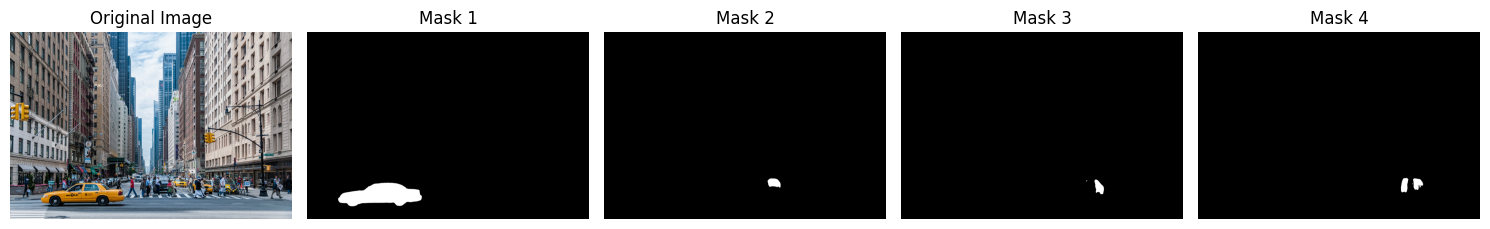

In [11]:
try:
  if len(masks) == 0:
            print(f"No objects of the '{text_prompt}' prompt detected in the image.")
  else:
      # Convert masks to numpy arrays
      masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

      # Display the original image and masks side by side
      display_image_with_masks(image_pil, masks_np)

except (requests.exceptions.RequestException, IOError) as e:
    print(f"Error: {e}")

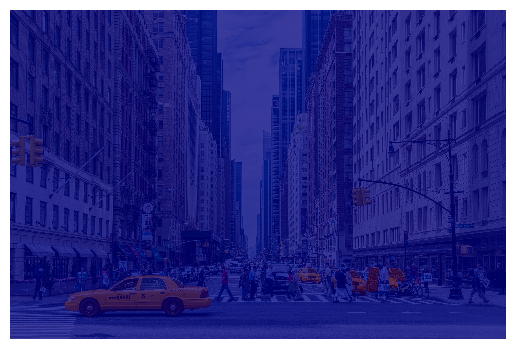

In [12]:
num_masks = len(masks)

plt.imshow(image_pil, cmap='gray', interpolation='none')
plt.axis('off')

for i, mask_np in enumerate(masks_np):
    plt.imshow(mask_np, cmap='jet', alpha=0.3, interpolation='none')
    plt.axis('off')

#plt.tight_layout()
plt.show()

In [13]:
streetview = "mvproject/NYC-street-scene.jpg"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


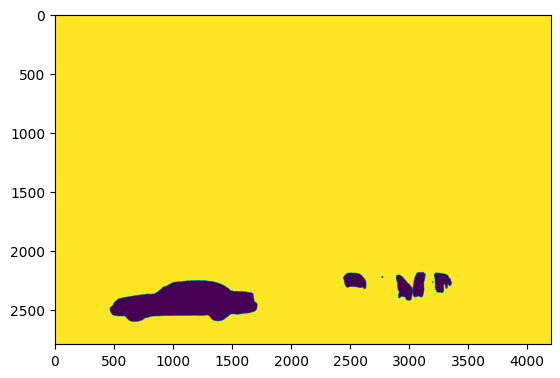

In [14]:
image_masked = cv2.imread(streetview)
super_mask = masks_np[0].astype(np.uint8)
print(super_mask)
for i, mask_np in enumerate(masks_np[1:]):
  super_mask = cv2.bitwise_or(super_mask, mask_np.astype(np.uint8))

super_mask = cv2.bitwise_not(super_mask)
plt.imshow(super_mask)
plt.show()

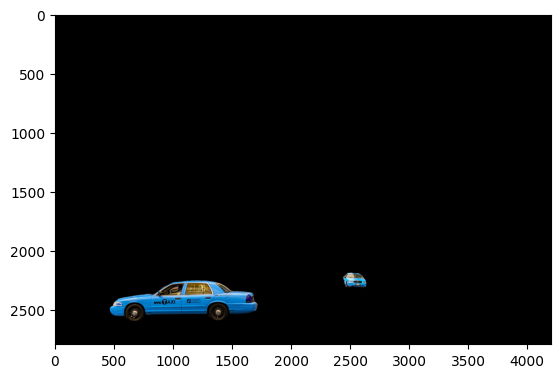

In [15]:
imageMain = cv2.imread(streetview)
mask1 = masks_np[0].astype(np.uint8)
_, mask_1 = cv2.threshold(mask1, 0, 255, cv2.THRESH_BINARY)

mask2 = masks_np[1].astype(np.uint8)
_, mask_2 = cv2.threshold(mask2, 0, 255, cv2.THRESH_BINARY)
new_image = cv2.bitwise_and(imageMain, imageMain, mask=mask_1)

#inverse_mask = cv2.bitwise_not(mask_image)
temp_image = cv2.bitwise_and(imageMain, imageMain, mask=mask_2)
new_image = cv2.bitwise_or(new_image, temp_image)
plt.imshow(new_image)
plt.show()

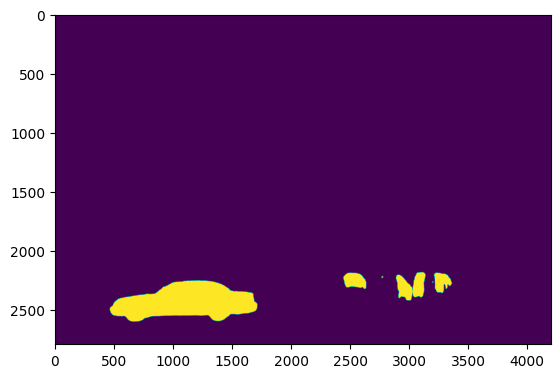

In [16]:
image_gray = cv2.cvtColor(imageMain, cv2.COLOR_BGR2GRAY)

super_mask = np.zeros_like(image_gray)
for i, mask_np in enumerate(masks_np):
  _, mask = cv2.threshold(mask_np.astype(np.uint8), 0, 1, cv2.THRESH_BINARY)
  super_mask = np.bitwise_or(super_mask, mask)

plt.imshow(super_mask)
plt.show()

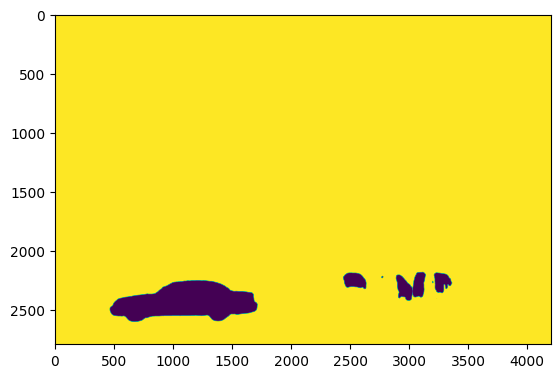

In [17]:
_, inverted_mask = cv2.threshold(super_mask, 0, 255, cv2.THRESH_BINARY_INV)
plt.imshow(inverted_mask)
plt.show()

This is the inverted mask on the grayscale image

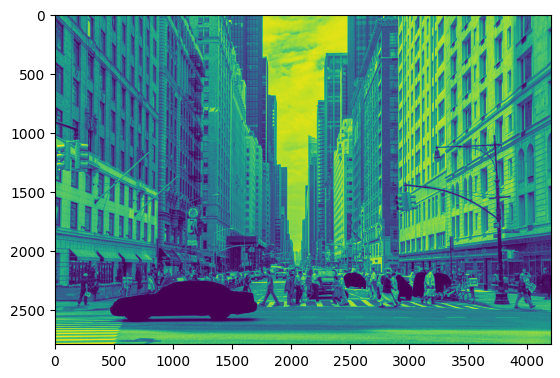

In [ ]:
maskedPic = cv2.bitwise_and(inverted_mask, image_gray)
plt.imshow(maskedPic)
plt.show()

The final mask that excludes the cars in the picture from the background. This step is crucial for the end-result

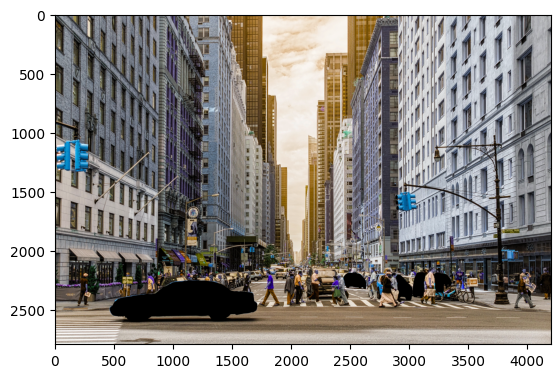

In [23]:
maskedPic = cv2.bitwise_and(imageMain, imageMain, mask = inverted_mask)
plt.imshow(maskedPic)
plt.show()

In [24]:
vcap = cv2.VideoCapture("mvproject/boat.mp4")
if not vcap.isOpened():
    print("File Cannot be Opened")

frames=[]
while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    #print cap.isOpened(), ret
    if frame is not None:
        # Display the resulting frame
        cv2.imshow('frame',frame)
        frames.append(frame)
        # Press q to close the video windows before it ends if you want
        if cv2.waitKey(22) & 0xFF == ord('q'):
            break
    else:
        print("Frame is None")
        break

# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()
print("Video stop")

Frame is None
Video stop


In [6]:
print(len(frames))

227


## The Pix-2-Pix model

The next model transforms our masked picture as per any prompt given. In this case, we are trying to generate a Monet style painting from the input image.

In [ ]:
%pip install huggingface_hub
%pip install python_dotenv
%pip install diffusers accelerate safetensors transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [24]:
mPic = Image.fromarray(maskedPic)
mPic.thumbnail((400,400))

In [28]:
import io
img_byte_arr = io.BytesIO()
mPic2 = Image.fromarray(maskedPic)
mPic2.thumbnail((400,400))
mPic2.save(img_byte_arr, format='IM')
img_byte_arr = img_byte_arr.getvalue()

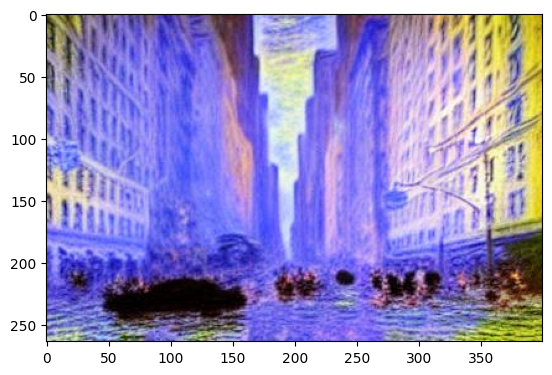

In [29]:
prompt = "Turn it into a monet style painting"
imageGogh = inference.image_to_image(img_byte_arr,prompt)
plt.imshow(imageGogh)
plt.show()

In [30]:
import PIL
b = io.BytesIO()
imageGogh.save(b,format="jpeg")
imageGogh2 = PIL.Image.open(b)

In [31]:
image_pil = image_pil.resize((400,264))

In [32]:
inverted_mask.resize((400,264))
inverted_mask.shape

(400, 264)

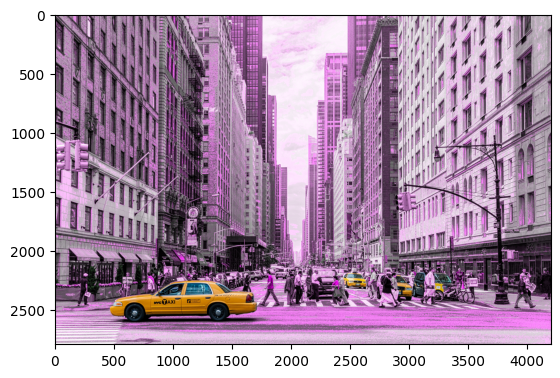

In [33]:
temp_im = cv2.cvtColor(imageMain, cv2.COLOR_BGR2RGB)
newPicture = cv2.bitwise_or(temp_im, maskedPic)
plt.imshow(newPicture)
plt.show()

In [34]:
imageGogh2 = PIL.Image.fromarray(np.array(imageGogh))
type(imageGogh2)

PIL.Image.Image

In [35]:
citySmall = Image.open(streetview)
citySmall = citySmall.resize((400,264))
citySmall.size

(400, 264)

In [36]:
citySmall = np.array(citySmall)
#citySmall = citySmall[:, :, ::-1].copy()
citySmall.size

316800

In [37]:
painting = np.array(imageGogh)
painting = painting[:, :, ::-1].copy()
painting.size

316800

The next cell shows our final result that shows cars in a Monet-styled background.

105600


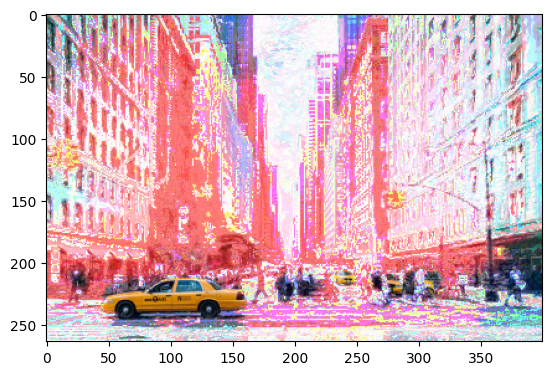

In [38]:
temp_im = cv2.cvtColor(np.array(painting), cv2.COLOR_RGB2GRAY)
temp_city = cv2.cvtColor(np.array(citySmall), cv2.COLOR_BGR2RGB)
print(temp_im.size)
plt.imshow(temp_im)
newPicture = cv2.bitwise_or(citySmall,painting)
plt.imshow(newPicture)

In [ ]:
def image_to_bytes(image):
    img_byte_arr = io.BytesIO()
    mPic2 = Image.fromarray(image)
    mPic2 = mPic2.resize((400,264))
    mPic2.save(img_byte_arr, format='JPEG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

def cv2_to_bytes(image):
    return np.array(cv2.imencode('.jpg',image)[1]).tobytes()
        
    
def image2cv2(image):
  return np.array(image)

def cv22image(image):
    coloredImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return Image.fromarray(coloredImg)

def convert_to_painting(frame):
  imageGogh = pix2pix(input_image=cv22image(frame),instruction="Turn it into a monet style painting", seed=12345, steps=50)
  return imageGogh

def get_masked_image(image, prompt):
    masks, boxes, phrases, logits = model.predict(cv22image(image), "boat")
    try:
        if len(masks) == 0:
                print(f"No objects of the '{text_prompt}' prompt detected in the image.")
        else:
            # Convert masks to numpy arrays
            image = cv2.cvtColor(frames[0], cv2.COLOR_RGB2GRAY)
            masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

            # Combine the masks into one super mask
            super_mask = np.zeros_like(image)
            for i, mask_np in enumerate(masks_np):
                _, mask = cv2.threshold(mask_np.astype(np.uint8), 0, 1, cv2.THRESH_BINARY)
                super_mask = np.bitwise_or(super_mask, mask)

            # Get an inverted mask from the super mask
            _, inverted_mask = cv2.threshold(super_mask, 0, 255, cv2.THRESH_BINARY_INV)

            # Apply the mask on the image
            abc = cv2.bitwise_and(image, image, mask = inverted_mask)
            return abc

    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Error: {e}")

/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


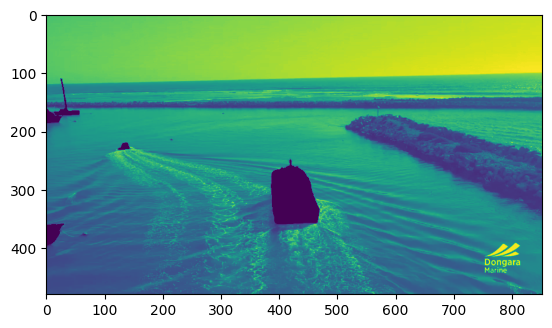

In [10]:

masks, boxes, phrases, logits = model.predict(cv22image(frames[0]), "boat")
try:
    if len(masks) == 0:
            print(f"No objects of the '{text_prompt}' prompt detected in the image.")
    else:
        # Convert masks to numpy arrays
        image = cv2.cvtColor(frames[0], cv2.COLOR_RGB2GRAY)
        masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

        # Combine the masks into one super mask
        super_mask = np.zeros_like(image)
        for i, mask_np in enumerate(masks_np):
            _, mask = cv2.threshold(mask_np.astype(np.uint8), 0, 1, cv2.THRESH_BINARY)
            super_mask = np.bitwise_or(super_mask, mask)

        # Get an inverted mask from the super mask
        _, inverted_mask = cv2.threshold(super_mask, 0, 255, cv2.THRESH_BINARY_INV)

        # Apply the mask on the image
        abc = cv2.bitwise_and(image, image, mask = inverted_mask)

except (requests.exceptions.RequestException, IOError) as e:
    print(f"Error: {e}")
plt.imshow(abc)

### Running the model

The Pix-2-Pix model runs on half precision, taking 8 seconds maximum to process any given image.

In [12]:
import torch
from PIL import ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline
import math


pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16, safety_checker=None)

device = "GPU" if torch.cuda.is_available() else "CPU"

if torch.cuda.is_available():
    pipe = pipe.to("cuda")


def pix2pix(
        input_image: Image.Image,
        instruction: str,
        steps: int,
        seed: int
    ):
        
        width=852
        height = 480
        input_image = ImageOps.fit(input_image, (width, height), method=Image.Resampling.LANCZOS)

        if instruction == "":
            return [input_image, seed]

        generator = torch.manual_seed(seed)
        edited_image = pipe(
            instruction, image=input_image,
            num_inference_steps=steps, generator=generator,
        ).images[0]
        print(f"EDITED: {edited_image}")
        return edited_image

/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]


100%|██████████| 50/50 [00:07<00:00,  6.27it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7301635017B0>


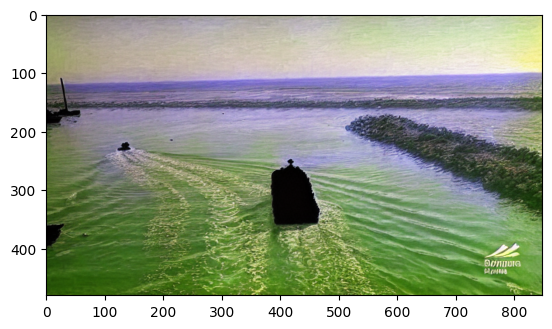

In [13]:
bytesabc = np.array(cv2.imencode('.jpg',abc)[1]).tobytes()
imageabc = pix2pix(input_image=cv22image(abc),instruction="Turn it into a monet style painting", seed=12345, steps=50)
# Convert from jpeg to Image
#pictureabc = PIL.Image.fromarray(np.array(imageabc))
# Resize the image
#pictureabc = cv2.resize(pictureabc, (400, 264), interpolation = cv2.INTER_AREA)
plt.imshow(imageabc)

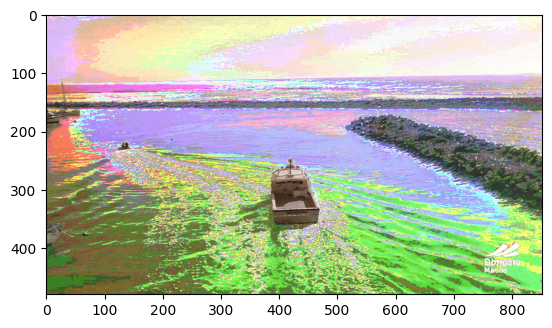

In [14]:
picture = cv2.resize(np.array(imageabc), (852,480), 
               interpolation = cv2.INTER_AREA)
pic = cv2.bitwise_or(frames[0], picture)
plt.imshow(pic)

The above is a sample of the actual project. 

We take a video of a boat as input and segment out any 'boats' from the frames. We 'Paint' this masked frame with the pix-2-pix model and recreate the video.
For the Pix-2-Pix model only 50 epochs have been used to train the input image. More epochs could give a more accurate image style.

For processing requirements, only 100 frames have been used in this project. With stronger processors a full-length video can be converted into a Van gogh style painting video too.

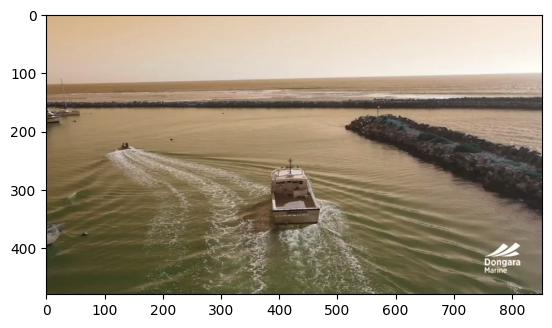

In [96]:
plt.imshow(frames[0])

In [37]:
maskedFrames = []
counter = 0
for frame in frames:
  if counter>100:
     break
  maskedFrame = get_masked_image(frame, "boat")
  maskedFrame = convert_to_painting(maskedFrame)
  maskedFrames.append(maskedFrame)
  counter+=1
  print("Image processed: ",counter)
  

/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 50/50 [00:07<00:00,  6.35it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9241F60>
Image processed:  1


100%|██████████| 50/50 [00:07<00:00,  6.35it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9243100>
Image processed:  2


100%|██████████| 50/50 [00:07<00:00,  6.33it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9243D30>
Image processed:  3


100%|██████████| 50/50 [00:07<00:00,  6.32it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297F70>
Image processed:  4


100%|██████████| 50/50 [00:07<00:00,  6.28it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294910>
Image processed:  5


100%|██████████| 50/50 [00:07<00:00,  6.28it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295090>
Image processed:  6


100%|██████████| 50/50 [00:07<00:00,  6.26it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295630>
Image processed:  7


100%|██████████| 50/50 [00:07<00:00,  6.26it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92952D0>
Image processed:  8


100%|██████████| 50/50 [00:08<00:00,  6.23it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295A20>
Image processed:  9


100%|██████████| 50/50 [00:08<00:00,  6.22it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294D90>
Image processed:  10


100%|██████████| 50/50 [00:08<00:00,  6.23it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296050>
Image processed:  11


100%|██████████| 50/50 [00:08<00:00,  6.22it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92957E0>
Image processed:  12


100%|██████████| 50/50 [00:08<00:00,  6.23it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296560>
Image processed:  13


100%|██████████| 50/50 [00:08<00:00,  6.23it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294670>
Image processed:  14


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295F60>
Image processed:  15


100%|██████████| 50/50 [00:08<00:00,  6.20it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294AC0>
Image processed:  16


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92964D0>
Image processed:  17


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296BC0>
Image processed:  18


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295120>
Image processed:  19


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294160>
Image processed:  20


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92945B0>
Image processed:  21


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295C00>
Image processed:  22


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296D70>
Image processed:  23


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296410>
Image processed:  24


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92972E0>
Image processed:  25


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294760>
Image processed:  26


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296FB0>
Image processed:  27


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92977C0>
Image processed:  28


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296BF0>
Image processed:  29


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294100>
Image processed:  30


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295ED0>
Image processed:  31


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296680>
Image processed:  32


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294B50>
Image processed:  33


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296E90>
Image processed:  34


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296770>
Image processed:  35


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92949D0>
Image processed:  36


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297DF0>
Image processed:  37


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296260>
Image processed:  38


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294C40>
Image processed:  39


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92968C0>
Image processed:  40


100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F13730>
Image processed:  41


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F119C0>
Image processed:  42


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297370>
Image processed:  43


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F132E0>
Image processed:  44


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F13130>
Image processed:  45


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F12B90>
Image processed:  46


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F11A50>
Image processed:  47


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50FB3D0>
Image processed:  48


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92950C0>
Image processed:  49


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9294460>
Image processed:  50


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92948B0>
Image processed:  51


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F13D00>
Image processed:  52


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296A40>
Image processed:  53


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9296830>
Image processed:  54


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297640>
Image processed:  55


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297CA0>
Image processed:  56


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297790>
Image processed:  57


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9297130>
Image processed:  58


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9295540>
Image processed:  59


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509C2E0>
Image processed:  60


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509ECE0>
Image processed:  61


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F10A30>
Image processed:  62


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F10A90>
Image processed:  63


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F10850>
Image processed:  64


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F11750>
Image processed:  65


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE4F10A60>
Image processed:  66


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50FBDF0>
Image processed:  67


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50BF700>
Image processed:  68


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92407F0>
Image processed:  69


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9242500>
Image processed:  70


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50F9E70>
Image processed:  71


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50FA170>
Image processed:  72


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE50FA0E0>
Image processed:  73


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92438B0>
Image processed:  74


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9243AC0>
Image processed:  75


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9242C80>
Image processed:  76


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9242260>
Image processed:  77


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9241480>
Image processed:  78


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9242080>
Image processed:  79


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509E0E0>
Image processed:  80


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509DFC0>
Image processed:  81


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509EBF0>
Image processed:  82


100%|██████████| 50/50 [00:08<00:00,  6.18it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509F9A0>
Image processed:  83


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509FD30>
Image processed:  84


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509D9C0>
Image processed:  85


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509EBC0>
Image processed:  86


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509E020>
Image processed:  87


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509ED10>
Image processed:  88


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509F7F0>
Image processed:  89


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509EEF0>
Image processed:  90


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE509DE10>
Image processed:  91


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92432B0>
Image processed:  92


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92430D0>
Image processed:  93


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9241C90>
Image processed:  94


100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92422F0>
Image processed:  95


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE92430A0>
Image processed:  96


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x72FFE9241B40>
Image processed:  97


100%|██████████| 50/50 [00:08<00:00,  6.17it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7301629FE2F0>
Image processed:  98


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7301629FE290>
Image processed:  99


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7301629FD210>
Image processed:  100


100%|██████████| 50/50 [00:08<00:00,  6.16it/s]


EDITED: <PIL.Image.Image image mode=RGB size=848x480 at 0x7301629FEDD0>
Image processed:  101
fourcc tag 0x7634706d/'mp4v' codec_id 000C
fourcc tag 0x31637661/'avc1' codec_id 001B
fourcc tag 0x33637661/'avc3' codec_id 001B
fourcc tag 0x31766568/'hev1' codec_id 00AD
fourcc tag 0x31637668/'hvc1' codec_id 00AD
fourcc tag 0x7634706d/'mp4v' codec_id 0002
fourcc tag 0x7634706d/'mp4v' codec_id 0001
fourcc tag 0x7634706d/'mp4v' codec_id 0007
fourcc tag 0x7634706d/'mp4v' codec_id 003D
fourcc tag 0x7634706d/'mp4v' codec_id 0058
fourcc tag 0x312d6376/'vc-1' codec_id 0046
fourcc tag 0x63617264/'drac' codec_id 0074
fourcc tag 0x7634706d/'mp4v' codec_id 00A3
fourcc tag 0x39307076/'vp09' codec_id 00A7
fourcc tag 0x31307661/'av01' codec_id 00E2
fourcc tag 0x6134706d/'mp4a' codec_id 15002
fourcc tag 0x63616c61/'alac' codec_id 15010
fourcc tag 0x6134706d/'mp4a' codec_id 1502D
fourcc tag 0x6134706d/'mp4a' codec_id 15001
fourcc tag 0x6134706d/'mp4a' codec_id 15000
fourcc tag 0x332d6361/'ac-3' codec_id 150

OpenCV: FFMPEG: format mp4 / MP4 (MPEG-4 Part 14)


/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/ddatta/.conda/envs/Python3.9/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


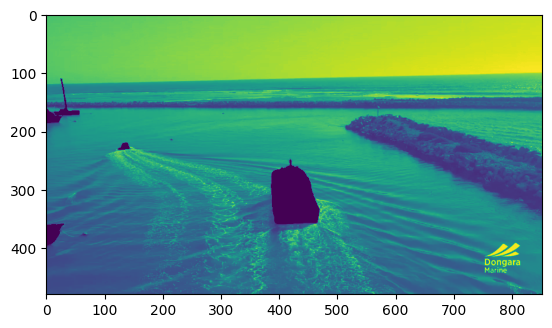

In [35]:
plt.imshow(get_masked_image(frames[99],'boat'))

In [19]:
print(frames[0].shape, np.array(maskedFrames[0]).shape)

(480, 852, 3) (480, 848, 3)


In [142]:
newFrame = frames[0][:,:848]
newFrame.shape

(480, 848, 3)

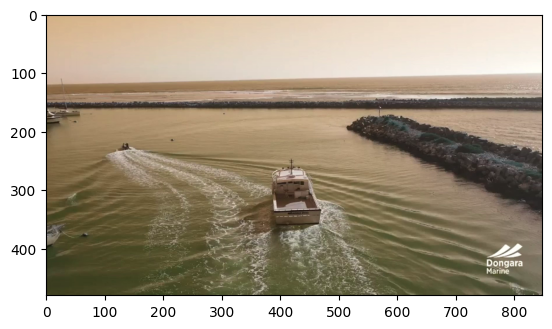

In [143]:
plt.imshow(newFrame)

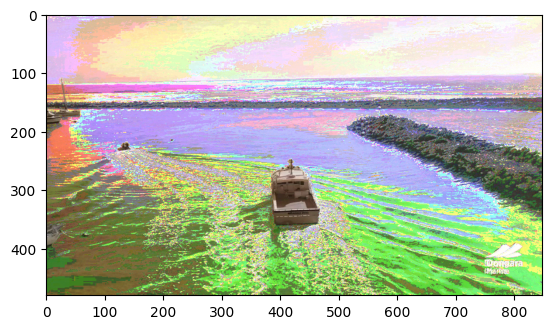

In [145]:
new_im = cv2.bitwise_or(newFrame, np.array(im))

plt.imshow(new_im)

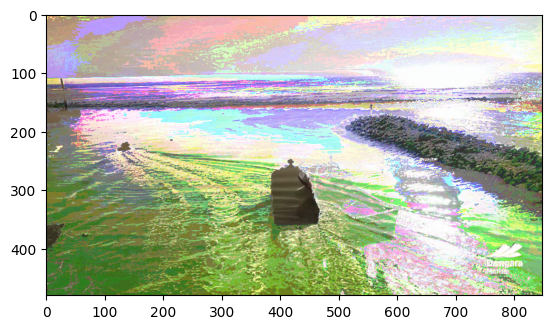

In [31]:
pic = cv2.bitwise_or(frames[99][:,:848], np.array(maskedFrames[99]))
plt.imshow(pic)

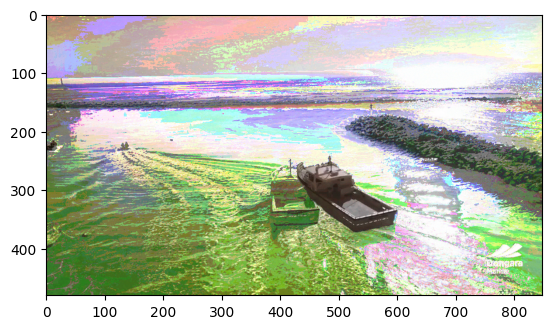

In [63]:
finalFrames=[]

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('mvproject/boatMasked.mp4', fourcc, 50, (848,480), isColor=True)

for i in range(100):
    finalFrame = cv2.bitwise_or(frames[i][:,:848], np.array(maskedFrames[i]))
    plt.imshow(finalFrame)
    video.write(finalFrame)
    cv2.imshow('frame',finalFrame)

cv2.destroyAllWindows()
video.release()